# Identifying Lyman-limit regions in SDSS spectra

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1AEV4zN104iCTxGKbpdPm_bhyXL4I9Vxg)

**↑ Click on this link above to execute this notebook live on Google Colab.**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloading data

### Software & saved results

The following will install the LLabs software into PYTHONPATH server runtime environment, along with its dependent packages, and will clone the Gitlab repository which contains the final results from our work. Instructions on how to reproduce those results will be provided in the next section.

In [ ]:
%%capture
!git clone https://gitlab.com/astroquasar/programs/llabs
!pip install -r llabs/requirements.txt
!ln -s /content/llabs/llabs $(python -c "import pip; print(pip.__path__[0].rstrip('/pip'))")
!git clone https://gitlab.com/astroquasar/publications/2022_dumont

### UVES / SQUADER dataset

For high-resolution quasar spectra, we used the quasar dataset from [SQUADER](https://data-portal.hpc.swin.edu.au/dataset/uves-squad-dr1/resource/8bab4405-4484-4b93-8376-e142409f88a5).

#### QSO catalog

Below we download the main catalog that contains all the information related to each spectrum in the SQUADER dataset:

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/MTMurphy77/UVES_SQUAD_DR1/master/DR1_quasars_master.csv

The catalog can be read using the Pandas library as shown below. While the catalog lists 475 rows, a total of 467 reduced UVES quasar spectra are in fact available.

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 5)
squader = pd.read_csv('DR1_quasars_master.csv')
squader

Name_Adopt     RA_Adopt    Dec_Adopt  zem_Adopt      RA_UVES  \
0    J000149-015939  00:01:49.94  -01:59:39.4      2.815  00:01:49.93   
1    J000322-260318  00:03:22.94  -26:03:18.3      4.098  00:03:23.05   
..              ...          ...          ...        ...          ...   
473  J235731-112539  23:57:31.18  -11:25:39.2      0.960  23:57:31.17   
474  J235953-124147  23:59:53.62  -12:41:47.8      0.868  23:59:53.57   

        Dec_UVES        RA_SSS       Dec_SSS   B_SSS  R1_SSS  ...  SlitWidths  \
0    -01:59:40.0  00:01:49.943  -01:59:39.34  18.689  18.309  ...     0.9,1.0   
1    -26:03:19.3  00:03:22.947  -26:03:18.37  19.548  17.155  ...         0.9   
..           ...           ...           ...     ...     ...  ...         ...   
473  -11:25:38.9  23:57:31.182  -11:25:39.25  18.752  18.170  ...           1   
474  -12:41:47.9  23:59:53.628  -12:41:47.87  16.769  13.878  ...           1   

     Binnings                 Settings          Seeing  \
0         2x2  346,390,437,580,760,860  0.56,1.50,2.03   
1         2x2                  437,860  0.34,0.49,1.97   
..        ...                      ...             ...   
473       2x2          390,437,580,760  0.63,0.72,0.94   
474       2x2          346,437,580,860  0.83,1.13,1.63   

                        ProgIDs            PIObjNames      DLAzabs  \
0    073.B-0787(A),66.A-0624(A)  q2359m0216,q2359m022  2.095,2.154   
1                  60.A-9022(A)                q00m26          NaN   
..                          ...                   ...          ...   
473               075.A-0841(A)           pksm2354m11          NaN   
474               078.B-0433(A)        qsom2359mm1241          NaN   

      DLAlogNHI  DLAelogNHI         DLAReference  
0    20.65,20.3     0.1,0.1  Zafar et al. (2013)  
1           NaN         NaN                  NaN  
..          ...         ...                  ...  
473         NaN         NaN                  NaN  
474         NaN         NaN                  NaN  

[475 rows x 42 columns]

#### QSO spectra

All the data can be download from the [HPC data portal from Swinburne University](https://data-portal.hpc.swin.edu.au/dataset/uves-squad-dr1/resource/8bab4405-4484-4b93-8376-e142409f88a5). Below we show how to download the entire dataset:

In [ ]:
%%capture
!wget https://data-portal.hpc.swin.edu.au/dataset/c4bad1eb-7e80-49c8-981e-ce44654f79ca/resource/8bab4405-4484-4b93-8376-e142409f88a5/download/dr1finalspectra.tar.gz

The downloaded repository can then be uncompressed and quasar spectra can be gathered into a single directory as follows:

In [ ]:
%%capture
!tar -zxvf dr1finalspectra.tar.gz
!ls *_Final_Spectrum.tar.gz | xargs -i tar -zxvf {}
!mkdir SQUADER
!mv J*/*.fits SQUADER
!rm -rf *.tar.gz J*

### SDSS DR12 quasar spectra

For the low-resolution quasar spectra samples, we used the entire quasar dataset from the [SDSS DR12 data release](https://www.sdss.org/dr12/algorithms/boss-dr12-quasar-catalog/).

#### QSO catalog

The main catalog, which contain all the information related to each spectrum, can be downloaded from the following link:

In [ ]:
%%capture
!wget https://data.sdss.org/sas/dr12/boss/qso/DR12Q/DR12Q.fits

The above catalog can be loaded using the astropy Python package:

In [ ]:
import astropy.io.fits as fits
boss_hdu = fits.open('/content/drive/Shareddrives/QuasarAstronomy/Objects/SDSS/DR12Q.fits')
boss_hdu.info()

Filename: /content/drive/Shareddrives/QuasarAstronomy/Objects/SDSS/DR12Q.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (19442,)   uint8   
  1  DR12Q.fits    1 BinTableHDU    644   297301R x 158C   [18A, D, D, J, J, J, J, D, E, E, J, D, D, D, D, D, D, I, K, K, K, K, J, 32J, 32J, 32J, J, J, J, J, I, D, D, 32D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, I, D, D, D, D, D, J, D, D, J, D, D, D, D, D, I, J, 3A, I, I, 19A, 5E, 5E, 5E, 5E, 5D, D, D, 5E, 5E, D, I, D, D, D, D, D, D, I, D, D, D, D, D, D, D, D, D, D, D, D, I, D, I, D, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 4A, D, I, E, E, E, E, E, E, E, E, I, D, D, D]   


The description of this data file can be found [here](https://data.sdss.org/datamodel/files/BOSS_QSO/DR12Q/DR12Q.html). Below we show how the data table look like. Since astropy data are recorded in Big Endian, the ``.byteswap().newbyteorder()`` attribute is required before passing the structured array to the pandas DataFrame constructor, as described in [this comment](https://github.com/astropy/astropy/issues/1156#issuecomment-19062708).

In [ ]:
import pandas as pd
from astropy.table import Table
pd.set_option('display.max_rows', 5)
data = Table(boss_hdu[1].data)
boss = pd.DataFrame.from_dict({header:data[header].byteswap().newbyteorder() if len(data[header].shape)==1 else 'n/a' for header in data.keys()})
boss

SDSS_NAME          RA        DEC   THING_ID  PLATE    MJD  \
0       000000.45+174625.4    0.001898  17.773739  268514930   6173  56238   
1       000000.66+145828.8    0.002756  14.974675  245101352   6177  56268   
...                    ...         ...        ...        ...    ...    ...   
297299  235959.83+344315.0  359.999293  34.720838  401440280   7145  56567   
297300  235959.98+344449.6  359.999942  34.747127  401440241   7145  56567   

        FIBERID      Z_VI    Z_PIPE  ERR_ZPIPE  ...         JFLUX  \
0           528  2.309097  2.309097   0.000943  ...  0.000000e+00   
1           595  2.497941  2.497941   0.000875  ...  2.310948e-31   
...         ...       ...       ...        ...  ...           ...   
297299      240  3.109000  3.113391   0.000370  ...  0.000000e+00   
297300      262  2.375000  2.397667   0.000357  ...  0.000000e+00   

           JFLUX_ERR         HFLUX     HFLUX_ERR         KFLUX     KFLUX_ERR  \
0       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1       4.565332e-32  2.355314e-31  5.970480e-32  2.427149e-31  6.521724e-32   
...              ...           ...           ...           ...           ...   
297299  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
297300  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

        FIRST_MATCHED  FIRST_FLUX  FIRST_SNR  SDSS2FIRST_SEP  
0                  -1         0.0        0.0             0.0  
1                   0         0.0        0.0             0.0  
...               ...         ...        ...             ...  
297299             -1         0.0        0.0             0.0  
297300             -1         0.0        0.0             0.0  

[297301 rows x 158 columns]

#### DLA catalog

A list of 34,050 Damped Lyman Alpha (DLA) systems were identified in the SDSS DR12 quasar samples. The original catalog can be found and downloaded from [Pasquier Noterdaeme's website](http://www2.iap.fr/users/noterdae/DLA). A copy of the file can also been found in this work's corresponding Gitlab repository (cloned at the beginning) and can be uncompressed as follows:

In [ ]:
%%capture
!tar -zxvf 2022_dumont/SDSS-DR12/DLA_DR12_v2.tgz

Below we show how to load the catalog and display some of the information available in the catalog:

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 5)
boss_dla = pd.read_csv('DLA_DR12_v2.dat',delim_whitespace=True,usecols=[1,2,3,4,9,10],low_memory=False).drop(0)
boss_dla

MJD-plate-fiber         RA       Dec   zqso   z_abs    NHI
1      56604-7167-0290    0.02128  -10.8139  2.711  2.4865  21.10
2      56265-6151-0936    0.04045  +12.6252  2.481  2.3743  20.02
...                ...        ...       ...    ...     ...    ...
34049  55810-4354-0660  359.98914   -1.6793  3.119  2.6123  20.30
34050  56567-7145-0240  359.99929  +34.7208  3.103  2.6422  21.39

[34050 rows x 6 columns]

#### QSO spectra

The following code can be executed to download locally the entirety of all the quasar spectra from the SDSS twelfth data release:

In [ ]:
import os
for plate,mjd,fiberid in zip(data['PLATE'],data['MJD'],data['FIBERID']):
  os.system('wget https://data.sdss.org/sas/dr12/boss/spectro/redux/v5_7_0/spectra/%04i/spec-%04i-%05i-%04i.fits' % (plate,plate,mjd,fiberid))
os.makedirs('DR12',exist_ok=True)
os.system('mv *.fits DR12/')

### Catalog of D/H systems



In [ ]:
import numpy
import pandas as pd
dtoh = numpy.array([
['J000344-232354',2.28000,2.18700],
# ['J001708+813508',3.36600,2.79796],
['J001708+813508',3.36600,3.32110],
['J010806+163550',2.65200,2.53600],
['J013301-400628',3.02300,2.80000],
['J034943-381030',3.22200,3.02500],
['J040718-441013',3.02000,2.62100],
['J042214-384452',3.11000,3.08600],
# ['J083141+524517',3.91100,3.37800],
['J083141+524517',3.91100,3.51400],
['J091613+070224',2.77400,2.61843],
['J095852+120245',3.29751,3.09622],
['J101155+294141',2.65200,2.50400],
['J113418+574204',3.52168,3.41088],
['J120523-074232',4.69490,4.67200],
['J124610+303117',2.56000,2.52566],
['J133724+315254',3.17300,3.17447],
['J135842+652236',3.19706,3.06726],
['J141950+082948',3.02911,3.04984],
['J155810-003120',2.82710,2.70262],
['J171938+480412',1.08300,0.70100],
# ['J193957-100241',3.78700,3.25590],
['J193957-100241',3.78700,3.57200],
['J220852-194400',2.57300,2.07620],
])
dtoh = pd.DataFrame(dtoh,columns=['qso', 'z_em','z_abs'])
print(dtoh)

               qso   z_em   z_abs
0   J000344-232354   2.28   2.187
1   J001708+813508  3.366  3.3211
..             ...    ...     ...
19  J193957-100241  3.787   3.572
20  J220852-194400  2.573  2.0762

[21 rows x 3 columns]


## Scanning of quasar spectra



### SQUADER dataset

In [ ]:
!ls SQUADER/*.fits > squader.dat
!/content/llabs/bin/llabs scan -r high -l squader.dat

In [ ]:
!llabs/bin/llabs best llabs.log

In [ ]:
import pandas as pd
squader_quality = pd.read_csv('/content/2022_dumont/SQUADER/quality_report.csv',header=0)

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 5)
data = pd.read_csv('/content/2022_dumont/SQUADER/llabs.csv',header=0)
data = data.sort_values(by=['llshift'],ascending=False).loc[data.llshift<4000]
data

qso  npix1a  npix1b  npix2a  npix2b  nleftHI  \
35  SQUADER/J053007-250329.fits     250     500     100     200        3   
96  SQUADER/J234403+034226.fits     250     500     100     200        7   
..                          ...     ...     ...     ...     ...      ...   
44  SQUADER/J094438+194111.fits     250     500     100     200       21   
77  SQUADER/J145147-151220.fits     250     500     100     200       18   

    nrightHI  llfuzzy   llhard    lldla  llshift  dlawidth   zalpha      N  \
35         6  3518.73  3520.33  3479.00  3540.51    544.89  2.81199  21.43   
96         4  4754.24  4754.24  4703.03  3246.77     33.77  4.15318  18.39   
..       ...      ...      ...      ...      ...       ...      ...    ...   
44        21  3689.19  3693.13  3692.50    51.66      0.00  3.04593  18.56   
77        18  5002.70  5005.42  5004.83    35.06      0.00  4.48388  18.90   

       b    snr  
35  50.0  33.93  
96   8.0   6.36  
..   ...    ...  
44   5.0   3.43  
77   5.0  22.88  

[62 rows x 16 columns]

In [ ]:
for i in range(len(dtoh)):
  spec = dtoh.iloc[i]
  mod = data[data['qso']=='squader/%s.fits'%spec.qso]
  if len(mod)==1:
    print(spec.qso,spec.z_abs,mod.zalpha.item())

J034943-381030 3.025 3.02502
J040718-441013 2.621 2.62199
J042214-384452 3.086 3.08697
J091613+070224 2.61843 2.61931
J120523-074232 4.672 4.48016
J193957-100241 3.572 3.57217


### SDSS DR12 dataset

In [ ]:
!ls DR12/*.fits > sdss.dat
!/content/llabs/bin/llabs scan -r low -l sdss.dat

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 5)
data = pd.read_csv('2022_dumont/SDSS-DR12/llabs.csv',header=0)
data = data.sort_values(by=['snr'],ascending=False)#.loc[(data.b>25)]
data

qso  npix1a  npix1b  npix2a  npix2b  llfuzzy  \
24   DR12/spec-3675-55183-0464.fits      50     100      20      40  3655.11   
930  DR12/spec-4604-55983-0922.fits      50     100      20      40  3870.79   
..                              ...     ...     ...     ...     ...      ...   
997  DR12/spec-4640-55927-0704.fits      50     100      20      40  3755.78   
741  DR12/spec-4407-55884-0507.fits      50     100      20      40  3894.93   

      llhard    lldla  llshift  dlawidth  zalpha      N     b    snr  
24   3669.44  3666.37   251.01    621.27  3.0173  20.38  10.0  41.75  
930  3885.97  3874.24   906.82    552.24  3.2451  19.94  49.0  36.76  
..       ...      ...      ...       ...     ...    ...   ...    ...  
997  3765.30  3718.04  3786.58  11388.54  3.0739  22.80  28.0   1.04  
741  3907.51  3850.67  4392.77   9111.23  3.2192  22.59  45.0   1.01  

[3519 rows x 14 columns]

## Results

### High-resolution spectra

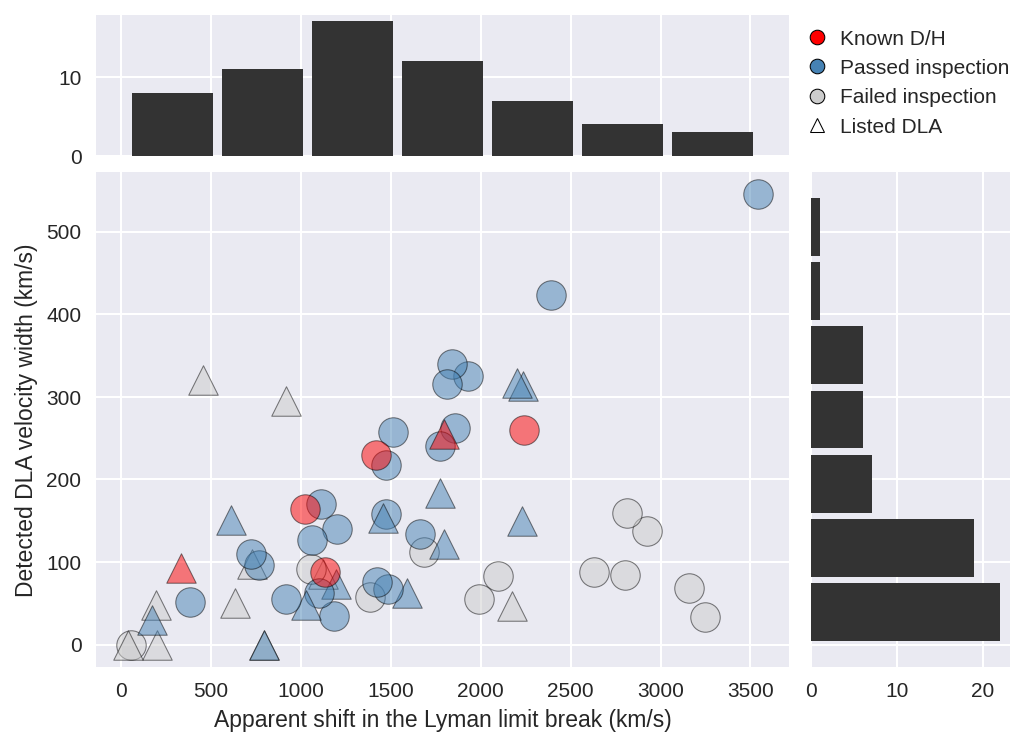

In [ ]:
import re
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('seaborn')
fig = plt.figure(figsize=(7,5),dpi=150)
gs = fig.add_gridspec(2,2,width_ratios=(7,2),height_ratios=(2,7),left=0.1,right=0.97,bottom=0.1,top=0.97,wspace=0.05,hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
for i in range(len(data)):
  dla = data.iloc[i]
  qsoname = re.split(r'[/.]',dla.qso)[-2]
  zabs = str(squader.loc[squader['Name_Adopt']==qsoname].DLAzabs.item())
  quality = squader_quality[squader_quality['qso']==qsoname].quality.item()
  zorder,color = (3,'red') if qsoname in dtoh['qso'].to_numpy() else (2,'steelblue') if str(quality)=='high' else (1,'0.8')
  marker = '^' if zabs=='nan' else 'o'
  ax.scatter(dla.llshift,dla.dlawidth,color=color,marker=marker,edgecolors='k',cmap='rainbow',s=200,alpha=0.5,lw=0.5,zorder=zorder)
ax.set_xlabel('Apparent shift in the Lyman limit break (km/s)')
ax.set_ylabel('Detected DLA velocity width (km/s)')
ax_histx.hist(data.llshift,rwidth=0.9,bins=7,histtype='bar',color='0.2')
ax_histy.hist(data.dlawidth,rwidth=0.9,bins=7,histtype='bar',color='0.2',orientation='horizontal')
line1 = Line2D([0], [0], label='Known D/H', color='red', lw=0, mew=0.5, mec='k', marker='o')
line2 = Line2D([0], [0], label='Passed inspection', color='steelblue', lw=0, mew=0.5, mec='k', marker='o')
line3 = Line2D([0], [0], label='Failed inspection', color='0.8', lw=0, mew=0.5, mec='k', marker='o')
line4 = Line2D([0], [0], label='Listed DLA', color='w', lw=0, mew=0.5, mec='k', marker='^')
plt.legend(handles=[line1,line2,line3,line4],bbox_to_anchor=(0.46, 1.18),ncol=1,loc='center',shadow=True,handletextpad=0.1)
plt.savefig('figure.pdf')
plt.show()

### Low-resolution spectra

In [ ]:
import pandas as pd
data = pd.read_csv('2022_dumont/SDSS-DR12/llabs.csv',header=0)
data = data.sort_values(by=['llshift'],ascending=False).loc[data.llshift<4000]
data

qso  npix1a  npix1b  npix2a  npix2b  llfuzzy  \
501   DR12/spec-4197-55479-0913.fits      50     100      20      40  4471.98   
1467  DR12/spec-5029-55750-0896.fits      50     100      20      40  3990.25   
...                              ...     ...     ...     ...     ...      ...   
3446  DR12/spec-7135-56564-0324.fits      50     100      20      40  4227.66   
245   DR12/spec-3876-55245-0974.fits      50     100      20      40  4183.12   

       llhard    lldla  llshift  dlawidth  zalpha      N     b   snr  
501   4491.59  4432.11  3996.25  11112.52  3.8563  22.73  30.0  3.53  
1467  3990.25  3937.43  3994.96  11250.53  3.3143  22.60  10.0  2.56  
...       ...      ...      ...       ...     ...    ...   ...   ...  
3446  4228.63  4236.86  -582.36   3520.48  3.6424  22.99  10.0  2.58  
245   4193.73  4207.65  -993.53   2277.97  3.6104  21.28  47.0  3.77  

[2873 rows x 14 columns]

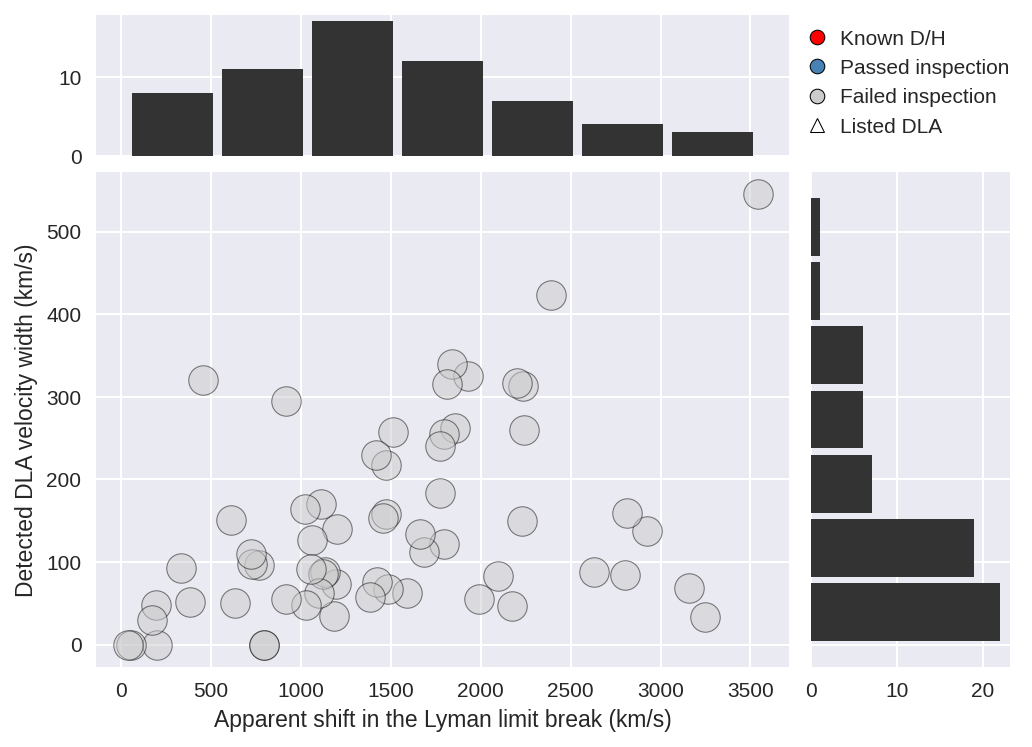

In [27]:
import re
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('seaborn')
fig = plt.figure(figsize=(7,5),dpi=150)
gs = fig.add_gridspec(2,2,width_ratios=(7,2),height_ratios=(2,7),left=0.1,right=0.97,bottom=0.1,top=0.97,wspace=0.05,hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
for i in range(len(data)):
  dla = data.iloc[i]
  qsoname = re.split(r'[/.]',dla.qso)[-2]
  # zabs = str(squader.loc[squader['Name_Adopt']==qsoname].DLAzabs.item())
  # quality = squader_quality[squader_quality['qso']==qsoname].quality.item()
  zorder,color = (1,'0.8')#(3,'red') if qsoname in dtoh['qso'].to_numpy() else (2,'steelblue') if str(quality)=='high' else (1,'0.8')
  marker = 'o'# if zabs=='nan' else 'o'
  ax.scatter(dla.llshift,dla.dlawidth,color=color,marker=marker,edgecolors='k',cmap='rainbow',s=200,alpha=0.5,lw=0.5,zorder=zorder)
ax.set_xlabel('Apparent shift in the Lyman limit break (km/s)')
ax.set_ylabel('Detected DLA velocity width (km/s)')
ax_histx.hist(data.llshift,rwidth=0.9,bins=7,histtype='bar',color='0.2')
ax_histy.hist(data.dlawidth,rwidth=0.9,bins=7,histtype='bar',color='0.2',orientation='horizontal')
line1 = Line2D([0], [0], label='Known D/H', color='red', lw=0, mew=0.5, mec='k', marker='o')
line2 = Line2D([0], [0], label='Passed inspection', color='steelblue', lw=0, mew=0.5, mec='k', marker='o')
line3 = Line2D([0], [0], label='Failed inspection', color='0.8', lw=0, mew=0.5, mec='k', marker='o')
line4 = Line2D([0], [0], label='Listed DLA', color='w', lw=0, mew=0.5, mec='k', marker='^')
plt.legend(handles=[line1,line2,line3,line4],bbox_to_anchor=(0.46, 1.18),ncol=1,loc='center',shadow=True,handletextpad=0.1)
plt.savefig('figure.pdf')
plt.show()